<a href="https://colab.research.google.com/github/mshafi710/kttsdataenrichment/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# def plot_word_frequency(word_freq,counts):

#       fig,ax=plt.subplots(figsize=(12,8))
#       prop=FontProperties(fname="/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf")
#       x=list(range(15))
#       xticks=counts.most_common(15)
#       print(type(xticks))
#       xticks2=[get_display(arabic_reshaper.reshape(str(tick))) for tick in xticks]

#       plt.xticks(x,xticks2,fontproperties=prop,fontsize=18)
#       word_freq.sort_values(by='count').plot.bar(x='words',
#                       y='count',
#                       ax=ax,
#                       color="green")
#       ax.set_title("Common Words Found")

#       plt.show()

#       prop=FontProperties(fname="/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf")
#       cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(counts)
#       plt.figure(figsize=(16,12))
#       plt.imshow(cloud, interpolation='bilinear')
#       plt.axis('off')
#       plt.show()


In [ ]:
# doc = docx.Document((dir_path+ "Edited Corpus.docx")
# print("Total Paragraphs:" + str(len(doc.paragraphs)))
#   for para in doc.paragraphs:
#     for sentence in para.text.split("۔"):
#       print (sentence)
#       print("Richness: "+ str(richness(sentence.strip())) )


In [ ]:
# import pathlib
# dir_path = "/content/drive/MyDrive/PhD/Dataset/Text/doc and text files/"
# text=""
# for path in os.listdir(dir_path):
#   # print("\n==================== Processing "+dir_path+ path)
#   if pathlib.Path(path).suffix == '.docx':
#     text = text + docx2txt.process(dir_path+path)

# text = text + docx2txt.process(dir_path+ "Edited Corpus.docx")

# summary(text)
# word_frequency(text,plot=True)


# for sentence in text.split("۔"):
#     print("Richness: "+ str(richness(sentence.strip())) )
  # doc = docx.Document(dir_path+path)
  # print("Total Paragraphs:" + str(len(doc.paragraphs)))
  # for para in doc.paragraphs:
  #   for sentence in para.text.split("۔"):
  #     print (sentence)
  #     print("Richness: "+ str(richness(sentence.strip())) )



In [ ]:
# !pip install fonttools
!pip install --upgrade arabic-reshaper[with-fonttools]
# !pip install --upgrade arabic-reshaper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display


reshaper = arabic_reshaper.ArabicReshaper(
    arabic_reshaper.config_for_true_type_font(
        '/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf')
)
res = {
 'الذكاء': 8,
 'الاصطناعي': 9,
 'هو': 2,
 'سلوك': 1,
 'وخصائص': 1,
 'ہُنٛد': 1,
 'تتسم': 1
}

res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in res.items()}

df = pd.DataFrame(res2.items(), columns=['word', 'count'])

sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="word", data=df)

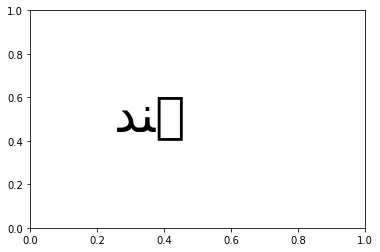

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape(u'ہُنٛد')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = '/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf',fontsize=50)
plt.show()

Text(0.5, 1.0, 'ﺪﻨﮨ ﺔﻴﺑﺮﻋ ﺔﻐﻟ')

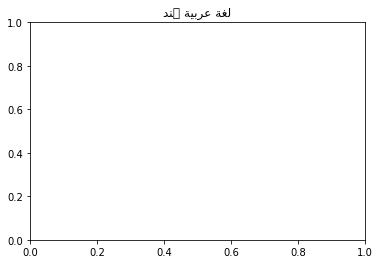

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display


reshaped_text = arabic_reshaper.reshape(u'لغةٌ عربيّة ہُنٛد')
bidi_text = get_display(reshaped_text)
plt.title(bidi_text)

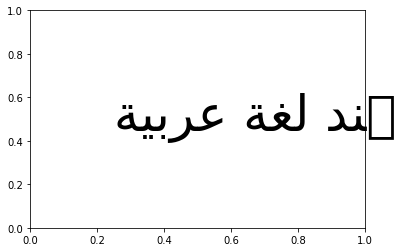

In [ ]:
import matplotlib.font_manager as font_manager

# Add every font at the specified location /content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf
font_dir = ['/content/drive/MyDrive/PhD/Dataset/Text/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
# rcParams['font.family'] = 'Afan_Koshur_Naksh'

from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape('ہُنٛد لغةٌ عربيّة')
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = 'Afan_Koshur_Naksh',fontsize=50)
plt.show()

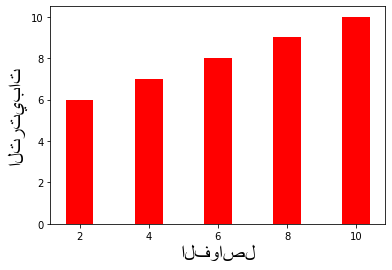

In [ ]:
import matplotlib
import matplotlib.font_manager as fm

# /content/drive/MyDrive/PhD/Dataset/Text/fonts/
# fm.fontManager.ttflist += fm.createFontList(['/content/drive/MyDrive/PhD/Dataset/Text/fonts/Afan_Koshur_Naksh.ttf'])
# fm.fontManager.addfont('/content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf')
# fm.list_fonts('/content/drive/MyDrive/PhD/Dataset/Text/fonts/','ttf')

path = '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/afan.ttf'
fontprop = fm.FontProperties(fname=path,size=20)
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 9, 10]

plt.bar(x, y, label='Bar1', color='red')
plt.xlabel(u"الفواصل", fontproperties=fontprop)
plt.ylabel(u"الترتيبات", fontproperties=fontprop)
plt.show()

# fm.findfont("afan.ttf")

In [ ]:
# !ls /content/drive/MyDrive/PhD/Dataset/Text/fonts
!ls /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/
!cp /content/drive/MyDrive/PhD/Dataset/Text/fonts/afan.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/


In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper

reshaped_text = arabic_reshaper.reshape('ہُنٛد لغةٌ عربيّة'.decode('utf8'))
artext = get_display(reshaped_text)

plt.text(0.25, 0.45, artext , name = 'Times New Roman',fontsize=50)
plt.show()

In [ ]:

# -*- coding: UTF-8 -*-

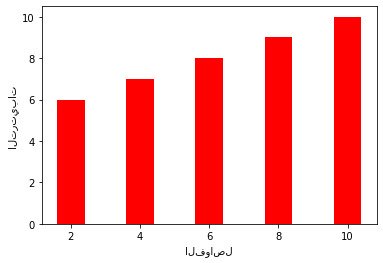

In [ ]:
x = [2, 4, 6, 8, 10]
y = [6, 7, 8, 9, 10]

plt.bar(x, y, label='Bar1', color='red')
plt.xlabel(u"الفواصل")
plt.ylabel(u"الترتيبات")
plt.show()


In [ ]:
# def word_frequency(text, plot=False):

#     unique_words= list(text.split(" "))
#     counts=Counter(unique_words)
#     print(len(counts))
#     print(counts.most_common(15))
#     word_freq = pd.DataFrame(counts.most_common(15),
#                              columns=['words', 'count'])
#     if plot is True:
#       plot_word_frequency(word_freq,counts)